In [16]:
import sys
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# Add the model directory to sys.path
sys.path.append("/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/src/app")

from train_cnn import *
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [17]:
get_version()

TensorFlow version: 2.17.0
Num GPUs Available:  1


In [6]:
base_dir = choose_directory()
files_count(base_dir)
params = Parameters(32, 450, 600)
train_ds, val_ds = train_test_split(base_dir, params)
model = create_and_compile()



10015 total images found.
2 labels:
      malignant
      benign
Found 10015 files belonging to 2 classes.
Using 8012 files for training.


I0000 00:00:1723539738.172214   32355 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723539738.172371   32355 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723539738.172414   32355 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723539738.347623   32355 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1723539738.347713   32355 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Found 10015 files belonging to 2 classes.
Using 2003 files for validation.


In [7]:
history = train_model(model, train_ds, val_ds, 24)

Epoch 1/100


I0000 00:00:1723539744.441108   32533 service.cc:146] XLA service 0x7f889c15bec0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1723539744.441740   32533 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-08-13 11:02:49.103088: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[64,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,224,299]{3,2,1,0}, f32[32,64,222,297]{3,2,1,0}), window={size=3x3}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0},"force_earliest_schedule":false} is taking a while...
2024-08-13 11:02:49.258232: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.15525839s

251/251 ━━━━━━━━━━━━━━━━━━━━ 130s 373ms/step - auc: 0.5927 - loss: 6.7471 - val_auc: 0.6405 - val_loss: 1.7257 - learning_rate: 0.0010
Epoch 2/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 69s 276ms/step - auc: 0.6786 - loss: 1.5278 - val_auc: 0.6898 - val_loss: 1.2021 - learning_rate: 0.0010
Epoch 3/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - auc: 0.6897 - loss: 1.1454 - val_auc: 0.4704 - val_loss: 1.0650 - learning_rate: 0.0010
Epoch 4/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 69s 276ms/step - auc: 0.7141 - loss: 0.9798 - val_auc: 0.7761 - val_loss: 0.7608 - learning_rate: 0.0010
Epoch 5/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 67s 265ms/step - auc: 0.7255 - loss: 0.8594 - val_auc: 0.6887 - val_loss: 0.9448 - learning_rate: 0.0010
Epoch 6/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 66s 261ms/step - auc: 0.7275 - loss: 0.8631 - val_auc: 0.3707 - val_loss: 0.8537 - learning_rate: 0.0010
Epoch 7/100
251/251 ━━━━━━━━━━━━━━━━━━━━ 64s 256ms/step - auc: 0.7385 - loss: 0.8375 - val_auc: 0.6770 - val_loss: 1.3151 - learning_ra

In [8]:
model_sumary(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 450, 600, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 448, 598, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 448, 598, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 224, 299, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 224, 299, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 222, 297, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 222, 297, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 111, 148, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 146, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 109, 146, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 54, 73, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 504576)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    32,292,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 97,167,429 (370.66 MB)

 Trainable params: 32,388,929 (123.55 MB)

 Non-trainable params: 640 (2.50 KB)

 Optimizer params: 64,777,860 (247.11 MB)

None


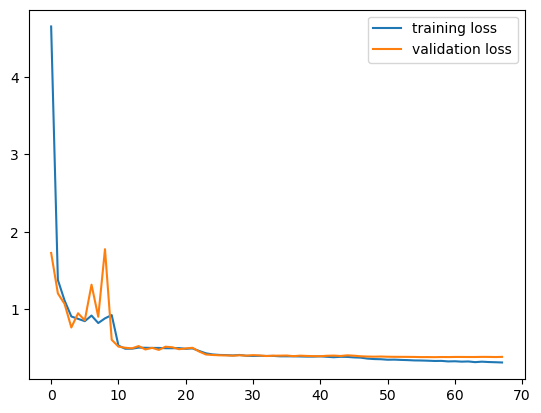

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

In [11]:
#model.save('/home/papafrita/Projects/skin_cancer_tool/Skin_cancer_diagnosis_tool/models/CNN_97M_earlystop.keras')

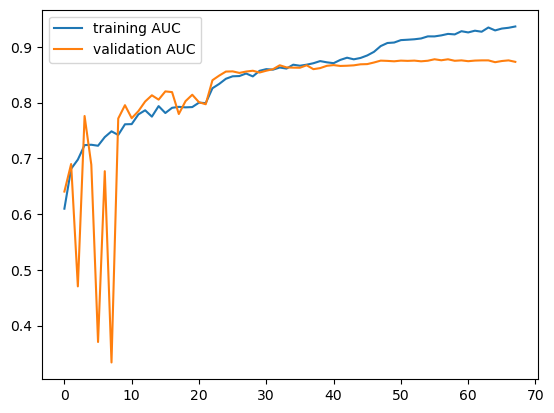

In [13]:
plt.plot(history.history['auc'], label='training AUC')
plt.plot(history.history['val_auc'], label='validation AUC')
plt.legend()
plt.show()